<a href="https://colab.research.google.com/github/Jeon1301/Mid-term/blob/main/221027change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**미니 프로젝트 B1 얼굴 찾기: SVM으로 분류하기**

**1. 데이터 확인**

**2. 미리 준비할 것**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

**3. 얼굴 이미지 읽고 확인해 보기**

In [8]:
url = 'https://github.com/Jeon1301/Mid-term/tree/main/faces/'

face_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64,64))
  face_images.append(img)


AttributeError: ignored

내 저장소에 사진을 추가하여 시도했지만 실패했다.
실패한 이유를 예상하자면 
새로운 이미지 파일이 사이킷 이미지로 변환을 실패한 것 같다

<Figure size 432x288 with 0 Axes>

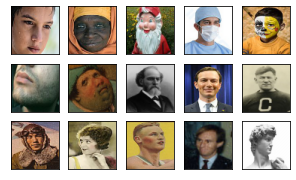

In [ ]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])


plot_images(3,5, face_images)

**4. 얼굴 이미지의 특징 데이터 구하기**

In [ ]:
face_hogs = []
face_features = []

for i in range(15):
    hog_desc, hog_image = hog(face_images[i], orientations=8, 
                              pixels_per_cell=(16, 16), cells_per_block=(1, 1), 
                              visualize=True, multichannel=True)
    face_hogs.append(hog_image)
    face_features.append(hog_desc)

<Figure size 432x288 with 0 Axes>

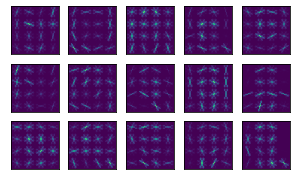

In [ ]:
plot_images(3, 5, face_hogs)

In [ ]:
print(face_features[0].shape)

(128,)


<Figure size 432x288 with 0 Axes>

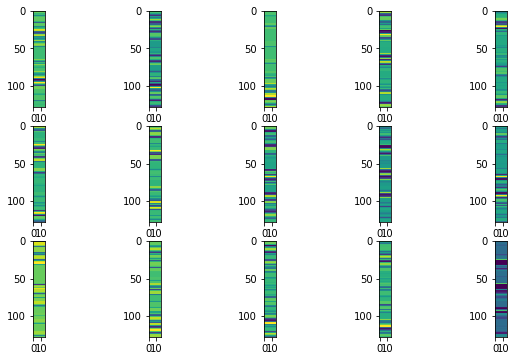

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(face_features[i*5+j], (128,16)))

**5. 사람 얼굴이 아닌 이미지의 특징 벡터 준비**

In [4]:
url = 'https://github.com/Jeon1301/Mid-term/tree/main/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3, 5, animal_images)

AttributeError: ignored

내 저장소에 사진을 추가하여 시도했지만 실패했다.

In [ ]:
animal_hogs = []
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, 
                              pixels_per_cell=(16, 16), cells_per_block=(1, 1), 
                              visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
 for j in range(5):
   ax[i, j].imshow(resize(animal_features[i*5+j], (128,16)))

**6. 학습을 위한 데이터 만들어 학습하기**

In [ ]:
X, y = [], []

for feature in face_features:
  X.append(feature)
  y.append(1)

for feature in animal_features:
  X.append(feature)
  y.append(0)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [ ]:
yhat = polynomial_svm_clf.predict(X)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**7. 새로운 데이터에 적용해 보기**

In [5]:
url = 'https://github.com/Jeon1301/Mid-term/tree/main/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

plot_images(2, 5, test_images)

AttributeError: ignored

마찬가지로 내 저장소에 사진을 추가하여 시도했지만 실패했다.

In [ ]:
test_hogs = []
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8, 
                              pixels_per_cell=(16, 16), cells_per_block=(1, 1),
                              visualize=True, multichannel=True)
    test_features.append(hog_desc)

test_result = polynomial_svm_clf.predict(test_features)
print(test_result)

[1 0 1 0 0 0 0 0 1 0]


<Figure size 432x288 with 0 Axes>

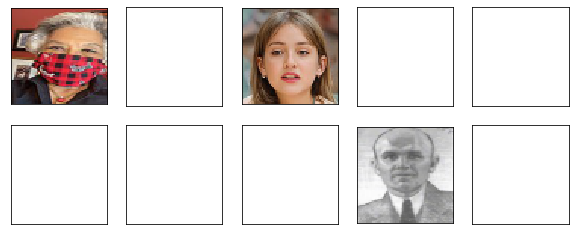

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
 for j in range(5):
   ax[i, j].get_xaxis().set_visible(False)
   ax[i, j].get_yaxis().set_visible(False)
   if test_result[i*5+j] == 1:
     ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')